In [ ]:
#Importing pandas to create DatFrame
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dataset Name: movies_metadata
movies=pd.read_csv('/content/drive/MyDrive/Hybrid dataset/movies_metadata.csv')
movies.head()

<ipython-input-3-cac4d15d49e1>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies=pd.read_csv('/content/drive/MyDrive/Hybrid dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
#Length of movies Dataset
movies.shape

(45466, 24)

In [ ]:
#Removing Duplicates record.This will remove row which is repeated more than once
movies.drop_duplicates(inplace=True)

In [ ]:
#length of movies Dataset after removing null values
movies.shape

(45453, 24)

In [ ]:
#Reseting index of dataframe. This will remove the old index and add new index in sorted form
movies.reset_index(drop=True, inplace=True)

In [ ]:
#Removing columns which are not useful for recommendation
movies.drop(columns=['poster_path','homepage','budget','status','video','release_date','spoken_languages'],inplace=True)

In [ ]:
#Checking for nan values . This will give count of missing data for each columns
movies.isna().sum()

adult                        0
belongs_to_collection    40959
genres                       0
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
production_companies         3
production_countries         3
revenue                      6
runtime                    263
tagline                  25045
title                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
#Since title has 6 missing data so taking out all records where title is not nan
movies_df=movies[movies['title'].

                 notna()]

In [ ]:
#Checking the count of movies id and title. Since counts of id and title are same we can proceed further
movies_df.count()

adult                    45447
belongs_to_collection     4490
genres                   45447
id                       45447
imdb_id                  45430
original_language        45436
original_title           45447
overview                 44493
popularity               45447
production_companies     45447
production_countries     45447
revenue                  45447
runtime                  45190
tagline                  20408
title                    45447
vote_average             45447
vote_count               45447
dtype: int64

In [ ]:
#importing new dataset named 'credits' which conatins the cast and crew information
credits=pd.read_csv('/content/drive/MyDrive/Hybrid dataset/credits.csv')
credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
#Length of Credit dataset
credits.shape

(45476, 3)

In [ ]:
#Analyzing cast data. cast data is in json formate and it contains list of dictionaries of chracters name in each records along with gender,profile and many more deatils
credits['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [ ]:
movies['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [ ]:
#Import ast library. It provies tools to parse data into python expression.For example if data is in string which contains list,
#So it will convert it into actual list by removing inverted comma
import ast

In [ ]:
# Parse strings containing lists into actual lists using ast.literal_eval or json.loads
credits['cast']=credits['cast'].apply(ast.literal_eval)

In [ ]:
# Parse strings containing lists into actual lists using ast.literal_eval or json.loads
credits['crew']=credits['crew'].apply(ast.literal_eval)

In [ ]:
# Parse strings containing lists into actual lists using ast.literal_eval or json.loads
movies_df['genres']=movies_df['genres'].apply(ast.literal_eval)

<ipython-input-19-3b556125926c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres']=movies_df['genres'].apply(ast.literal_eval)


In [ ]:
#flatten list
#credits['cast']=credits['cast'].apply(lambda x:[item for sublist in x for item in sublist])
#credits['crew']=credits['crew'].apply(lambda x:[item for sublist in x for item in sublist])

In [ ]:
cast_list=credits['cast'].tolist()

In [ ]:
#After parsing, data looks like below
cast_list=credits['cast'].tolist()
cast_list[:5]

[[{'cast_id': 14,
   'character': 'Woody (voice)',
   'credit_id': '52fe4284c3a36847f8024f95',
   'gender': 2,
   'id': 31,
   'name': 'Tom Hanks',
   'order': 0,
   'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
  {'cast_id': 15,
   'character': 'Buzz Lightyear (voice)',
   'credit_id': '52fe4284c3a36847f8024f99',
   'gender': 2,
   'id': 12898,
   'name': 'Tim Allen',
   'order': 1,
   'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
  {'cast_id': 16,
   'character': 'Mr. Potato Head (voice)',
   'credit_id': '52fe4284c3a36847f8024f9d',
   'gender': 2,
   'id': 7167,
   'name': 'Don Rickles',
   'order': 2,
   'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
  {'cast_id': 17,
   'character': 'Slinky Dog (voice)',
   'credit_id': '52fe4284c3a36847f8024fa1',
   'gender': 2,
   'id': 12899,
   'name': 'Jim Varney',
   'order': 3,
   'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
  {'cast_id': 18,
   'character': 'Rex (voice)',
   'credit_id': '52fe4284c3a36847f8024fa

In [ ]:
#This function will return the only first cast name present in each each record. if cast name does not exist ,will return empty string
def top_cast_genre_f(value):
  try:
    return value[0]['name']
  except:
    return ""


In [ ]:
#This function return the name of the crew where job is director. if not exist return empty string
def top_crew_f(value):
    for data in value:
      try:
        if data['job']=='Director':
          return data['name']
          break
      except:
        return ""



In [ ]:
credits['top_cast']=credits['cast'].apply(top_cast_genre_f)
credits['top_crew']=credits['crew'].apply(top_crew_f)
movies_df['top_genre']=movies_df['genres'].apply(top_cast_genre_f)

<ipython-input-25-64940376ed6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['top_genre']=movies_df['genres'].apply(top_cast_genre_f)


In [ ]:
#removing duplicates
credits.dropna(inplace=True)
credits.head(5)

,cast,crew,id,top_cast,top_crew
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Tom Hanks,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Robin Williams,Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Walter Matthau,Howard Deutch
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Whitney Houston,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Steve Martin,Charles Shyer


In [ ]:
#This function will covert id into integer if it is in string or in any other formate
def clean_id(value):
  if isinstance(value,str):
    cleaned_value=value.replace("'","")
    if cleaned_value.isdigit():
      return int(cleaned_value)
    else:
      return -1
  else:
    return value

In [ ]:
movies_df['id']=movies_df['id'].apply(clean_id)
credits['id']=credits['id'].apply(clean_id)

<ipython-input-28-83819266a482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['id']=movies_df['id'].apply(clean_id)


In [ ]:
#merging movies dataset with credits dataset based on the id
movies_df_merge=movies_df.merge(credits[['id','top_cast','top_crew']],on='id',how='inner')

In [ ]:
#Verifying the top_cast and top_crew
movies_df_merge[movies_df_merge['title']=='Avatar']

,adult,belongs_to_collection,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,top_genre,top_cast,top_crew
14514,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2.787965e+09,162.0,Enter the World of Pandora.,Avatar,7.2,12114.0,Action,Sam Worthington,James Cameron


In [ ]:
#content based filtering

In [ ]:
#movies_df_merge[movies_df_merge['id']==-1]

In [ ]:
# Combine the text from 'overview', 'top_cast', and 'top_crew' columns into a single column
movies_df_merge['combined_text'] = movies_df_merge['overview'] + ' ' + movies_df_merge['top_cast'] + ' ' + movies_df_merge['top_crew'] +' '+movies_df_merge['top_genre']

In [ ]:
movies_df_merge.head(3)

,adult,belongs_to_collection,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,tagline,title,vote_average,vote_count,top_genre,top_cast,top_crew,combined_text
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,Animation,Tom Hanks,John Lasseter,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,Adventure,Robin Williams,Joe Johnston,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Romance,Walter Matthau,Howard Deutch,A family wedding reignites the ancient feud be...


In [ ]:
#Checking the count of combined text column
movies_df_merge.count()

adult                    44620
belongs_to_collection     4464
genres                   44620
id                       44620
imdb_id                  44608
original_language        44609
original_title           44620
overview                 43750
popularity               44620
production_companies     44620
production_countries     44620
revenue                  44620
runtime                  44408
tagline                  20243
title                    44620
vote_average             44620
vote_count               44620
top_genre                44620
top_cast                 44620
top_crew                 44620
combined_text            43750
dtype: int64

In [ ]:
#Since the count of combined text column is less than the title we fill remaining fields with empty string so that it matches
#total count of title
movies_df_merge['combined_text'].fillna('', inplace=True)
movies_df_merge.count()


adult                    44620
belongs_to_collection     4464
genres                   44620
id                       44620
imdb_id                  44608
original_language        44609
original_title           44620
overview                 43750
popularity               44620
production_companies     44620
production_countries     44620
revenue                  44620
runtime                  44408
tagline                  20243
title                    44620
vote_average             44620
vote_count               44620
top_genre                44620
top_cast                 44620
top_crew                 44620
combined_text            44620
dtype: int64

In [ ]:
#Considering only those movies which has vote count greater than 50 for better recommendation
movies_data=movies_df_merge[movies_df_merge['vote_count']>50]

In [ ]:
# importing Tfidfvectorizer. Its a NLP tool to convert text into numerical values
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#creating an instance or object of tfidf class
tfidf=TfidfVectorizer(max_df=0.8,token_pattern=r"(?u)\b[a-zA-Z]{3,}\b",analyzer='word',stop_words='english',ngram_range=(1,3),strip_accents='unicode')

In [ ]:
#applying the fit_transform method to calcluate the numerical values based on important terms
tfidf_matrix=tfidf.fit_transform(movies_data['combined_text'])

In [ ]:
#for each movie  more than 5 lakhs  diffrent terms/features/words got selected
tfidf_matrix.shape

(9051, 524923)

In [ ]:
#features_names=tfidf.get_feature_names_out()
#for i in range(400,500):
 # print(l[i])

In [ ]:
#importing sigmoid kernel algorithm to calculate the simlarity with respect to each movie
from sklearn.metrics.pairwise import sigmoid_kernel
sigmoid_similarity=sigmoid_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
#reverse indice
movies_data.reset_index(drop=True,inplace=True)
indices=pd.Series(movies_data.index,index=movies_data['title'])
#indices[:20]
indices['Avatar']

5290

In [ ]:
sigmoid_similarity[5290]

array([0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [ ]:
#Defining function for content_recommendation
def content_recommendation(title):
  idx=indices[title]

  sim=list(enumerate(sigmoid_similarity[idx]))

  sorted_sim=sorted(sim,key=lambda x:x[1],reverse=True)

  selected_indices=sorted_sim[1:11]

  movie_indices=[i[0] for i in selected_indices]
  sim_score=[i[1] for i in selected_indices]
  #print(sim_score)

  return movies_data['title'].iloc[movie_indices].tolist()


In [ ]:
content_recommendation('The Matrix')

['Man of Tai Chi',
 'The Matrix Revisited',
 'Little Buddha',
 'The Animatrix',
 'The Matrix Revolutions',
 'Bound',
 'The Matrix Reloaded',
 "Henry's Crime",
 '47 Ronin',
 'Chain Reaction']

In [ ]:
#Colaborative Filtering
import pandas as pd

In [ ]:
#rating dataframe
ratings=pd.read_csv('/content/drive/MyDrive/Hybrid dataset/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
#Length of Rating dataframe 26M
ratings.shape

(26024289, 4)

In [ ]:
#linker dataset. This will be used to add title column into the Rating dataframe. Sice movieid column is common
link=pd.read_csv('/content/drive/MyDrive/Hybrid dataset/links.csv')
link.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
def clean_id_f(value,ex):
  if isinstance(value,str):
    value=value.replace(ex,"")
    if value.isdigit():
      return int(value)
    else:
      return -1
  else:
    return  value

In [ ]:
movies['imdb_id']=movies['imdb_id'].apply(clean_id_f,ex="tt0")
link['imdbId']=link['imdbId'].apply(clean_id_f,ex="")

In [ ]:
#movies['imdb_id'].replace('tt0','')
#After clean function imdbid contains only integer values
movies[movies['title']=='Avatar']


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,499549.0,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0


In [ ]:
#link[link['imdbId']==499549]

In [ ]:
#renaming imdbId column
link.rename(columns={'imdbId':'imdb_id'},inplace=True)

In [ ]:
link_df=link.merge(movies[['imdb_id','title']],on='imdb_id',how='inner')
link_df.head(5)

,movieId,imdb_id,tmdbId,title
0,1,114709,862.0,Toy Story
1,2,113497,8844.0,Jumanji
2,3,113228,15602.0,Grumpier Old Men
3,4,114885,31357.0,Waiting to Exhale
4,5,113041,11862.0,Father of the Bride Part II


In [ ]:
ratings_df=ratings.merge(link_df[['movieId','title','imdb_id']],on='movieId',how='inner')
ratings_df.head(3)

,userId,movieId,rating,timestamp,title,imdb_id
0,1,110,1.0,1425941529,Braveheart,112573
1,11,110,3.5,1231676989,Braveheart,112573
2,22,110,5.0,1111937009,Braveheart,112573


In [ ]:
ratings_df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump                91921
The Shawshank Redemption    91082
Pulp Fiction                87901
The Silence of the Lambs    84078
The Matrix                  77960
                            ...  
Positive I.D.                   1
Port of New York                1
Port of Flowers                 1
Porridge                        1
ファンタスティポ                        1
Name: rating, Length: 27739, dtype: int64

In [ ]:
ratings_df['total_vote_count']=ratings_df.groupby('title')['rating'].transform('count')
ratings_df.head(2)

,userId,movieId,rating,timestamp,title,imdb_id,total_vote_count
0,1,110,1.0,1425941529,Braveheart,112573,66512.0
1,11,110,3.5,1231676989,Braveheart,112573,66512.0


In [ ]:
import seaborn as sns

<Axes: xlabel='total_vote_count', ylabel='Count'>

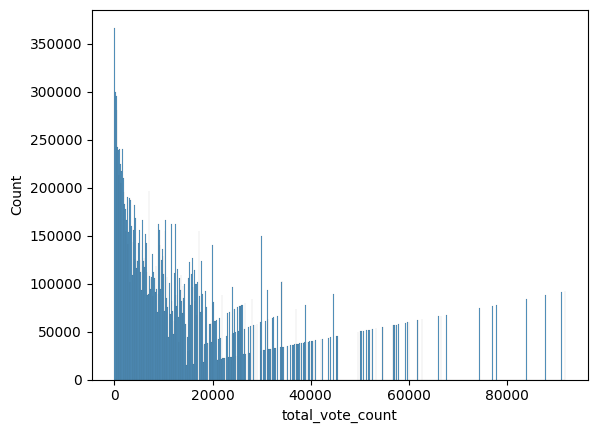

In [ ]:
#most of movies are voted between to 0 to 20000 votes
#it will not recommend good if we select all the movies because many movies are having very less votes
sns.histplot(ratings_df['total_vote_count'])

In [ ]:
ratings_df['total_vote_count'].quantile(0.30)

5584.0

In [ ]:
#Therefore select only those movies which has more than 8000 votes. Basically we selecting 60%  of all the movies which has highest votes
threshold=int(ratings_df['total_vote_count'].quantile(0.30))
movies_after_threshold=ratings_df[ratings_df['total_vote_count']>threshold]

In [ ]:
movies_after_threshold.drop_duplicates(inplace=True)

<ipython-input-34-737ea00c7c96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_after_threshold.drop_duplicates(inplace=True)


In [ ]:
movies_after_threshold['title'].fillna('')

0           Braveheart
1           Braveheart
2           Braveheart
3           Braveheart
4           Braveheart
               ...    
23956874      Swingers
23956903    Robin Hood
23957383         Drive
23957384         Drive
23957951          Hero
Name: title, Length: 16768440, dtype: object

In [ ]:
#This is a 2d matrix which contains movies name as index and all the userid votes as columns
matrix=movies_after_threshold.pivot_table(index='title',columns='userId',values='rating').fillna(0)

In [ ]:
matrix.head(2)

userId,1,2,3,4,5,6,7,8,9,10,...,270887,270888,270889,270890,270891,270892,270893,270894,270895,270896
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

from scipy.sparse import csr_matrix

In [ ]:
#Compressing the matrix into csr_matrix which will improve the boost the calculation speed
sparse_matrix=csr_matrix(matrix)

In [ ]:
sparse_matrix.shape

(1114, 268951)

In [ ]:

from sklearn.neighbors import NearestNeighbors

In [ ]:
#Creatings the object of nearestneighbor class
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')

In [ ]:
#it calculates the cosine similary for every movie
model_knn.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
movies_data_col= movies_after_threshold.drop_duplicates(subset='title')
movies_data_col.head(5)

,userId,movieId,rating,timestamp,title,imdb_id,total_vote_count
0,1,110,1.0,1425941529,Braveheart,112573,66512.0
71479,1,858,5.0,1425941523,The Godfather,68646,57070.0
128549,1,1221,5.0,1425941546,The Godfather: Part II,71562,36679.0
165228,1,1246,5.0,1425941556,Dead Poets Society,97165,25752.0
190980,1,1968,4.0,1425942148,The Breakfast Club,88847,26611.0


In [ ]:
len(movies_data_col)

1114

In [ ]:
movies_after_threshold.reset_index(drop=True)
indices_rating=pd.Series(movies_data_col.index,index=movies_data_col['title'])

In [ ]:
indices_rating.head(10)

title
Braveheart                       0
The Godfather                71479
The Godfather: Part II      128549
Dead Poets Society          165228
The Breakfast Club          190980
The Sixth Sense             217591
Ferris Bueller's Day Off    267234
Fight Club                  295056
Memento                     355080
Donnie Darko                395786
dtype: int64

In [ ]:
def colaborative_recommedation(title):
  idx=indices_rating[title]
  distance,index=model_knn.kneighbors(matrix.iloc[idx,:].values.reshape(1,-1),n_neighbors=11)
  index=index.flatten()
  list_1=movies_series[index].tolist()
  return list_1[1:]


In [ ]:
colaborative_recommedation('Avatar')

In [ ]:
#Selcting 10 movies from each collabortaive and content and then returning the list of movies where after every two consecutive movies
# of content based one colaborative movie conatins
def hybrid_recommendation(title):
  list1=colaborative_recommedation(title)
  list2=content_recommendation(title)
  for i in list1:
    if i in list2:
      list1.remove(i)
  for i in range(len(list1)):
    list2.insert(i+2*i+2,list1[i])


  return list2


In [ ]:
hybrid_recommendation('The Matrix')

In [ ]:
from IPython.display import HTML
from IPython.display import display
df=['/jPbBDALAjTQFzCl21ZKmhjSjEmD.jpg']
def display_recommendations(df):

    images = ''
    for ref in df:
            if '.' in str(ref):
                link = 'http://image.tmdb.org/t/p/w185/' + str(ref)
                images += "<img style='width: 120px; margin: 0px; \
                  float: left; border: 1px solid black;' src='%s' />" \
              % link
    display(HTML(images))

In [ ]:
display_recommendations(df)